# StackOverFlow Tag Prediction

### Problem Description

Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.

Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.

.

### Problem Statemtent

Suggest the tags based on the content that was there in the question posted on Stackoverflow.

### My Underastanding of Problem

* From Probelm Description , We can say that for each question there may contains one or many TAGS
*  so for ecah question we need to predict  TAG or TAGS
* here input to data be Title,Question etc......
* output will be TAGs
* so here output may be any no_of_tags from a given tags
* So this is MULTILABELClassification  Problem

### Real World / Business Objectives and Constraints
       
       * Predict as many tags as possible with high precision and recall.
       * Incorrect tags could impact customer experience on StackOverflow.
       * No strict latency constraints.

### Data

#### DataOverview

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data 
All of the data is in 2 files: Train and Test.

Train.csv contains 4 columns: Id,Title,Body,Tags.

Test.csv contains the same columns but without the Tags, which you are to predict.

Size of Train.csv - 6.75GB

Size of Test.csv - 2GB

Number of rows in Train.csv = 6034195

The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).


#### Data Field Explaination

Dataset contains 6,034,195 rows. The columns in the table are:

Id - Unique identifier for each question

Title - The question's title

Body - The body of the question

Tags - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')

#### Example of Data:

Title:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
Body : 

        #include<
        iostream>\n
        #include<
        stdlib.h>\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
              
                ..................code here .......
                
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        
       
The answer should come in the form of a table like

\n  
       
        1            50              50\n       
        2            50              50\n        
        50           50              99\n       
        50           50              100\n
        
\n    
if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)

\n\n
        
The output is not coming,can anyone correct the code or tell me what\'s wrong?

\n'
Tags : 'c++ c'

###  Mapping the real-world problem to a Machine Learning Problem

####Type of Machine Learning Problem

* It is a multi-label classification problem 
* Multi-label Classification: Multilabel classification assigns to each sample a set of target labels. 
* This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. 
* A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. 
* Credit: http://scikit-learn.org/stable/modules/multiclass.html

#### Performance metric
* Micro-Averaged F1-Score (Mean F Score) : The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

* F1 = 2 (precision recall) / (precision + recall)

* In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. 

*  'Micro f1 score': 
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance. 

*  'Macro f1 score': 
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account. 

* https://www.kaggle.com/wiki/MeanFScore 
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html 

* Hamming loss : The Hamming loss is the fraction of labels that are incorrectly predicted. 
https://www.kaggle.com/wiki/HammingLoss 

### Libraries used for this Code

In [0]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
#from skmultilearn.adapt import mlknn
#from skmultilearn.problem_transform import ClassifierChain
#from skmultilearn.problem_transform import BinaryRelevance
#from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

#### Data Present in Google DRive MOunting to Google Collab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp "/content/drive/My Drive/StackOverFlowProbelm/data/train_no_dup.db" "train_no_dup.db"
!cp "/content/drive/My Drive/StackOverFlowProbelm/data/Titlemoreweight.db" "Titlemoreweight.db"

# putting CSV data into SQLLite Database

* Step1: 
    * Creating the train.db databse in SQLLite DB
    * by using method create_engine('sqlite:///yourpreferenceDataBaseName(train.db)')
* Step2:
    * in Particular Database we can Store many tables
    * how to Store tables in particular dataBase in SqlLite?
    * we can do it by using df.tosql("NameOfTable",whichDBDoestableCreatein,if_exists='append') Method

In [0]:
#Creating db file from csv
#Learn SQL: https://www.w3schools.com/sql/default.asp
if not os.path.isfile('train.db'):
    start = datetime.now()
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('/home/bhargav/AAIC/DataSets/StackOverFlowTag/Train.csv', names=['Id', 'Title', 'Body', 'Tags'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('stackoverflowdata', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1
    print("Time taken to run this cell :", datetime.now() - start)

##  Exploratory Data Analysis
### Data Loading and Cleaning

### Reading Data from Particular Table in the Particular DataBase by 
* Step1: By 
    * Establishing Connecting to that DB
    * sqlite3.connect('dataBaseName')
* Step2: 
    * Query on that Table 
    * pd.read_sql_query("""Query""", con)

In [0]:
if os.path.isfile('train.db'):
    start = datetime.now()
    con = sqlite3.connect('train.db')
    num_rows = pd.read_sql_query("""SELECT count(*) FROM stackoverflowdata""", con)
    #Always remember to close the database
    print("Number of rows in the database :","\n",num_rows['count(*)'].values[0])
    con.close()
    print("Time taken to count the number of rows :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cell to genarate train.db file")

Please download the train.db file from drive or run the above cell to genarate train.db file


In [0]:
#Learn SQl: https://www.w3schools.com/sql/default.asp
if os.path.isfile('train.db'):
    start = datetime.now()
    con = sqlite3.connect('train.db')
    df_no_dup = pd.read_sql_query('SELECT Title, Body, Tags, COUNT(*) as cnt_dup FROM stackoverflowdata GROUP BY Title, Body, Tags', con)
    con.close()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the first to genarate train.db file")

## Checking whether Duplicates Present or not

In [0]:
df_no_dup.head()
# we can observe that there are duplicates

### here we are checking at what percentage dupliactes are precent on STAKEOVERFLOW DATA

In [0]:
print("number of duplicate questions :", num_rows['count(*)'].values[0]- df_no_dup.shape[0], "(",(1-((df_no_dup.shape[0])/(num_rows['count(*)'].values[0])))*100,"% )")

### number of times each question appeared in our database

In [0]:

df_no_dup.cnt_dup.value_counts()

### adding a new feature number of tags per question

In [0]:
start = datetime.now()
df_no_dup["tag_count"] = df_no_dup["Tags"].apply(lambda text: len(text.split(" ")))
# adding a new feature number of tags per question
print("Time taken to run this cell :", datetime.now() - start)
df_no_dup.head()

### distribution of number of tags per question

In [0]:
df_no_dup.tag_count.value_counts()

### Creating a new database with no duplicates
* DataBase Name : train_no_dup.db
* Table name : no_dup_train

In [0]:
#Creating a new database with no duplicates
if not os.path.isfile('train_no_dup.db'):
    disk_dup = create_engine("sqlite:///train_no_dup.db")
    no_dup = pd.DataFrame(df_no_dup, columns=['Title', 'Body', 'Tags'])
    no_dup.to_sql('no_dup_train',disk_dup)

## Removing UnWanted Columns from the  no_dup_train table in train_no_dup.db

In [0]:
#This method seems more appropriate to work with this much data.
#creating the connection with database file.
if os.path.isfile('train_no_dup.db'):
    start = datetime.now()
    con = sqlite3.connect('train_no_dup.db')
    tag_data = pd.read_sql_query("""SELECT Tags FROM no_dup_train""", con)
    #Always remember to close the database
    con.close()

    # Let's now drop unwanted column.
    tag_data.drop(tag_data.index[0], inplace=True)
    #Printing first 5 columns from our data frame
    tag_data.head()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cells to genarate train.db file")

Time taken to run this cell : 0:03:47.831341


### Text to Vectors Conversion using BOW Method
### Here we are converting Tags in each dataPoint to vectors

In [0]:
# Importing & Initializing the "CountVectorizer" object, which 
#is scikit-learn's bag of words tool.

#by default 'split()' will tokenize each tag using space.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
tag_dtm = vectorizer.fit_transform(tag_data['Tags'])

In [0]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 4206314
Number of unique tags : 42048


In [0]:
#'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tags we have :", tags[:10])

Some of the tags we have : ['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store']


In [0]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [0]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_counts_dict_dtm.csv'):
    with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138


In [0]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

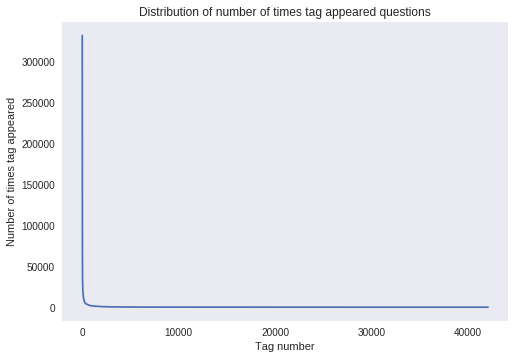

In [0]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

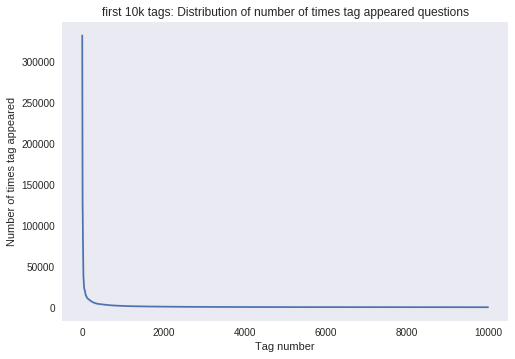

400 [331505  44829  22429  17728  13364  11162  10029   9148   8054   7151
   6466   5865   5370   4983   4526   4281   4144   3929   3750   3593
   3453   3299   3123   2989   2891   2738   2647   2527   2431   2331
   2259   2186   2097   2020   1959   1900   1828   1770   1723   1673
   1631   1574   1532   1479   1448   1406   1365   1328   1300   1266
   1245   1222   1197   1181   1158   1139   1121   1101   1076   1056
   1038   1023   1006    983    966    952    938    926    911    891
    882    869    856    841    830    816    804    789    779    770
    752    743    733    725    712    702    688    678    671    658
    650    643    634    627    616    607    598    589    583    577
    568    559    552    545    540    533    526    518    512    506
    500    495    490    485    480    477    469    465    457    450
    447    442    437    432    426    422    418    413    408    403
    398    393    388    385    381    378    374    370    367    365
  

In [0]:
plt.plot(tag_counts[0:10000])
plt.title('first 10k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:10000:25]), tag_counts[0:10000:25])

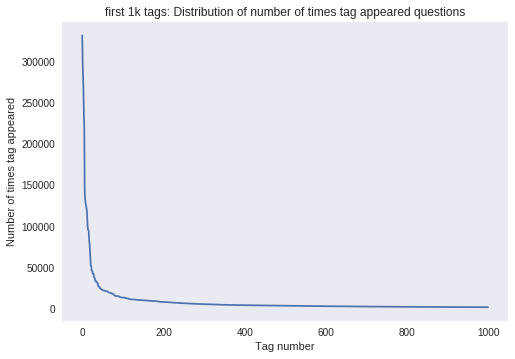

200 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483
   3453   3427   3396   3363   3326   3299   3272   3232   3196   3168
   3123   3094   3073   3050   3012   2989   2984   2953   2934   2903
   2891   2844   2819   2784   2754   2738   2726   2708   2681   2669
   2647   2621   2604   2594   2556   2527   2510   2482   2460   2444
  

In [0]:
plt.plot(tag_counts[0:1000])
plt.title('first 1k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:1000:5]), tag_counts[0:1000:5])

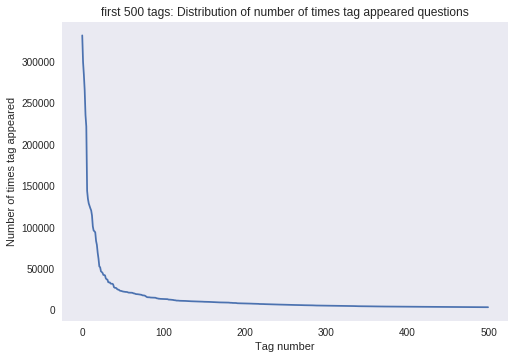

100 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483]


In [0]:
plt.plot(tag_counts[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:500:5]), tag_counts[0:500:5])

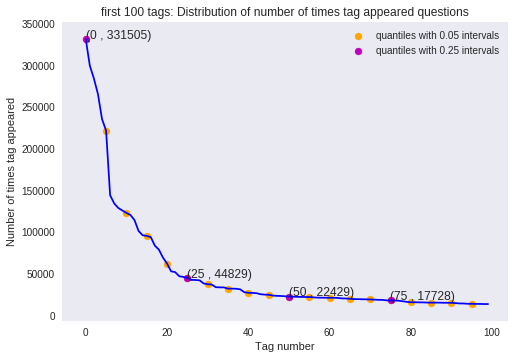

20 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703]


In [0]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [0]:
# Store tags greater than 10K in one list
lst_tags_gt_10k = tag_df[tag_df.Counts>10000].Tags
#Print the length of the list
print ('{} Tags are used more than 10000 times'.format(len(lst_tags_gt_10k)))
# Store tags greater than 100K in one list
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags
#Print the length of the list.
print ('{} Tags are used more than 100000 times'.format(len(lst_tags_gt_100k)))

153 Tags are used more than 10000 times
14 Tags are used more than 100000 times


In [0]:
#Storing the count of tag in each question in list 'tag_count'
tag_quest_count = tag_dtm.sum(axis=1).tolist()
#Converting each value in the 'tag_quest_count' to integer.
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:5])

We have total 4206314 datapoints.
[3, 4, 2, 2, 3]


In [0]:
print( "Maximum number of tags per question: %d"%max(tag_quest_count))
print( "Minimum number of tags per question: %d"%min(tag_quest_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.899440


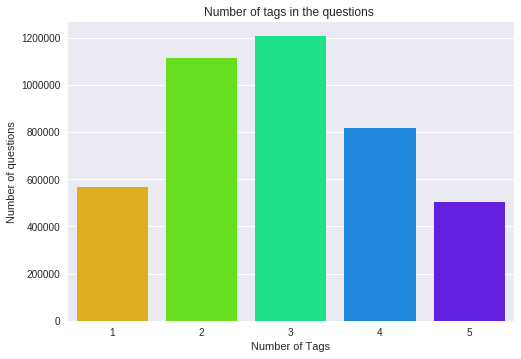

In [0]:
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

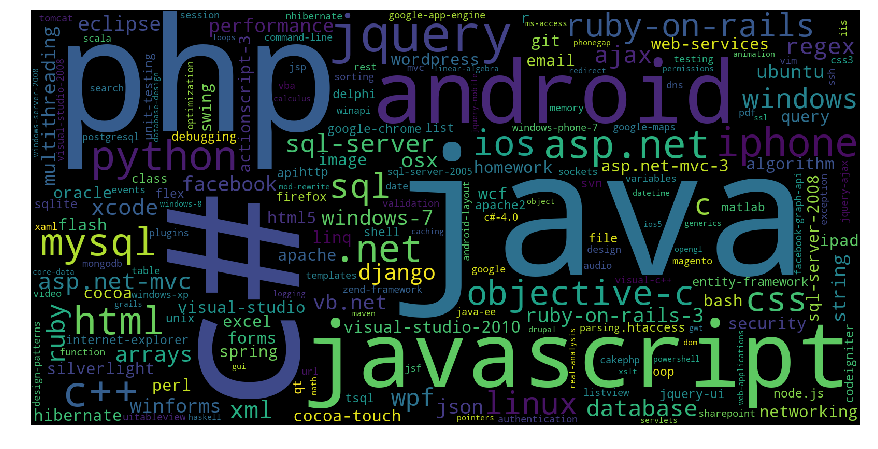

Time taken to run this cell : 0:00:03.670664


In [0]:
# Ploting word cloud
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

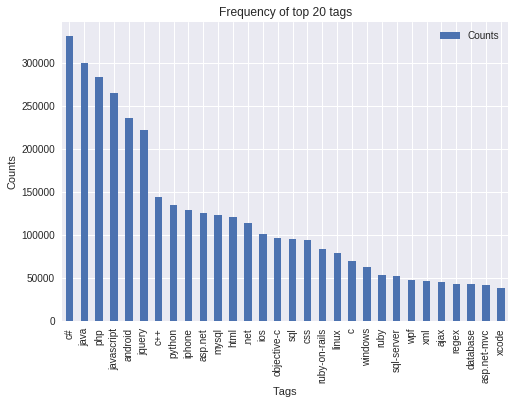

In [0]:
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

## 3.3 Cleaning and preprocessing of Questions


In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [0]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Processed.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [0]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table
start = datetime.now()
read_db = 'train_no_dup.db'
write_db = 'Processed.db'
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 1000000;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")
print("Time taken to run this cell :", datetime.now() - start)

Tables in the databse:
QuestionsProcessed
Cleared All the rows
Time taken to run this cell : 0:50:54.987591


In [0]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/

start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:

    is_code = 0

    title, question, tags = row[0], row[1], row[2]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

In [0]:
# dont forget to close the connections, or else you will end up with locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

In [0]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
conn_r.commit()
conn_r.close()

In [0]:
#Taking 1 Million entries to a dataframe.
write_db = 'Processed.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed limit 50000""", conn_r)
conn_r.commit()
conn_r.close()

In [0]:
preprocessed_data.head()

,question,tags
0,chang cpu soni vaio pcg grx tri everywher find...,cpu motherboard sony-vaio replacement disassembly
1,display size grayscal qimag qt abl display ima...,c++ qt qt4
2,datagrid selecteditem set back null eventtocom...,mvvm silverlight-4.0
3,filter string collect base listview item resol...,c# winforms string listview collections
4,disabl home button without use type keyguard c...,android android-layout android-manifest androi...


In [0]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 50000
number of dimensions : 2


In [0]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

In [0]:
 multilabel_y.sum(axis=0).tolist()[0]

[1,
 2,
 1,
 1,
 2,
 1,
 1,
 180,
 1,
 1316,
 2,
 13,
 1,
 54,
 58,
 9,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 30,
 49,
 8,
 23,
 3,
 1,
 1,
 1,
 10,
 2,
 2,
 6,
 9,
 2,
 1,
 1,
 1,
 49,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 13,
 14,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 5,
 1,
 3,
 5,
 1,
 1,
 1,
 1,
 1,
 3,
 8,
 1,
 5,
 67,
 18,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 9,
 1,
 1,
 2,
 2,
 1,
 4,
 4,
 1,
 3,
 5,
 1,
 1,
 6,
 16,
 2,
 9,
 3,
 1,
 1,
 11,
 1,
 5,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 1,
 8,
 1,
 1,
 3,
 3,
 1,
 1,
 6,
 2,
 1,
 20,
 2,
 18,
 1,
 6,
 1,
 6,
 10,
 1,
 1,
 2,
 3,
 51,
 1,
 14,
 192,
 3,
 3,
 1,
 6,
 89,
 1,
 5,
 1,
 1,
 8,
 1,
 1,
 72,
 2,
 1,
 3,
 19,
 51,
 2,
 1,
 2,
 3,
 4,
 1,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 1,
 3,
 11,
 9,
 11,
 1,
 2,
 7,
 2,
 1,
 1,
 3,
 2,
 1,
 1,
 2,
 2,
 1,
 6,
 6,
 1,
 2,
 2,
 5,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 22,
 1,
 13,
 5,
 12,
 4,
 48,
 1,
 25,
 5,
 1,
 1,
 1,
 1,
 1,
 4,
 4,

In [0]:
x=multilabel_y.sum(axis=1)
x.shape
np.count_nonzero

<function numpy.core.numeric.count_nonzero(a, axis=None)>

In [0]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [0]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

In [0]:
questions_explained

[90.082,
 91.27,
 92.35,
 92.988,
 93.694,
 94.246,
 94.716,
 95.028,
 95.398,
 95.69,
 95.988,
 96.232,
 96.426,
 96.696,
 96.878,
 97.056,
 97.188,
 97.31,
 97.438,
 97.558,
 97.658,
 97.798,
 97.904,
 97.972,
 98.046,
 98.122,
 98.186,
 98.254,
 98.316,
 98.386,
 98.47,
 98.532,
 98.588,
 98.634,
 98.676,
 98.726,
 98.772,
 98.81,
 98.848,
 98.878,
 98.908,
 98.938,
 98.964,
 98.994,
 99.03,
 99.054,
 99.092,
 99.112,
 99.15,
 99.174,
 99.2,
 99.22,
 99.238,
 99.25,
 99.276,
 99.3,
 99.318,
 99.348,
 99.36,
 99.38,
 99.398,
 99.416,
 99.438,
 99.454,
 99.472,
 99.504,
 99.518,
 99.53,
 99.544,
 99.562,
 99.576,
 99.594,
 99.61,
 99.632,
 99.642,
 99.65,
 99.656,
 99.666,
 99.668,
 99.674,
 99.682,
 99.69,
 99.706,
 99.712,
 99.716,
 99.724,
 99.726,
 99.734,
 99.744,
 99.75,
 99.756,
 99.762,
 99.768,
 99.774,
 99.778,
 99.788,
 99.796,
 99.804,
 99.81,
 99.816,
 99.822,
 99.828,
 99.836,
 99.838,
 99.84,
 99.846,
 99.846,
 99.848,
 99.852,
 99.856,
 99.856,
 99.86,
 99.87,
 99.874,

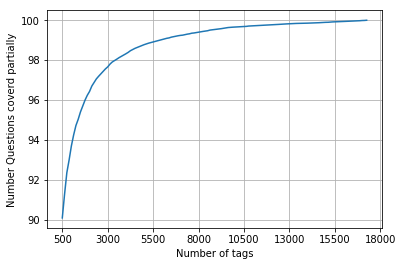

with  5500 tags we are covering  99.2 % of questions


In [0]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")

In [0]:
multilabel_yx = tags_to_choose(5500)
print("number of questions that are not covered :", questions_explained_fn(5500),"out of ", total_qs)

number of questions that are not covered : 400 out of  50000


In [0]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample : 13935
number of tags taken : 5500 ( 39.46896304269824 %)


In [0]:
total_size=preprocessed_data.shape[0]
train_size=int(0.80*total_size)

x_train=preprocessed_data.head(train_size)
x_test=preprocessed_data.tail(total_size - train_size)

y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

In [0]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (40000, 5500)
Number of data points in test data : (10000, 5500)


In [0]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:25.802866


In [0]:
start = datetime.now()
vectorizer = CountVectorizer(min_df=0.00009, max_features=200000, \
                             tokenizer = lambda x: x.split(), ngram_range=(1,4))
x_train_multilabel_bow = vectorizer.fit_transform(x_train['question'])
x_test_multilabel_bow = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:34.259962


In [0]:
# binary='true' will give a binary vectorizer
#vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
#multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

In [0]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

In [0]:
print("Dimensions of train data X:",x_train_multilabel_bow.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel_bow.shape,"Y:",y_test.shape)

Dimensions of train data X: (40000, 106719) Y : (40000, 5500)
Dimensions of test data X: (10000, 106719) Y: (10000, 5500)


## Logistic Regression with One Vs Rest

In [0]:
# this will be taking so much time try not to run it, download the lr_with_equal_weight.pkl file and use to predict
# This takes about 6-7 hours to run.
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))


In [0]:
from sklearn.externals import joblib
joblib.dump(classifier, 'lr_with_equal_weight.pkl') 

## Machine Learning Models 

### AS 1M DataPoints is tomuch for processing in my Google collab.so Decreasing it to 0.5M along with 500Tags
### preparing data which consists of  0.5M Data points along with  3 times  giving weight to  title and  considering  500 Tags

In [0]:
sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Titlemoreweight.db", sql_create_table )

Tables in the databse:
QuestionsProcessed


In [0]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table

read_db = 'train_no_dup.db'
write_db = 'Titlemoreweight.db'
train_datasize = 400000
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        # for selecting first 0.5M rows
        reader.execute("SELECT Title, Body, Tags From no_dup_train LIMIT 500001;")
        # for selecting random points
        #reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 500001;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")

Tables in the databse:
QuestionsProcessed
Cleared All the rows


In [0]:
a=0
for row in reader:
  a+=1
  if(a<=5):
    print(row)
    break

('     Implementing Boundary Value Analysis of Software Testing in a C++ program?', '<pre><code>#include&lt;iostream&gt;\n#include&lt;stdlib.h&gt;\n\nusing namespace std;\n\nint main()\n{\n         int n,a[n],x,c,u[n],m[n],e[n][4];\n         cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         for(int y=1; y&lt;n+1; y++)\n         {\n                 cin&gt;&gt;m[y];\n                 cin&gt;&gt;u[y];\n         }\n         for(x=1; x&lt;n+1; x++)\n         {\n                 a[x] = (m[x] + u[x])/2;\n         }\n         c=(n*4)-4;\n         for(int a1=1; a1&lt;n+1; a1++)\n         {\n\n             e[a1][0] = m[a1];\n             e[a1][1] = m[a1]+1;\n             e[a1][2] = u[a1]-1;\n             e[a1][3] = u[a1];\n         }\n         for(int i=1; i&lt;n+1; i++)\n         {\n            for(int l=1; l&lt;=i; l++)\n            {\n                 if(l!=1)\n                 {\n      

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/
start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:
    
    is_code = 0
    
    title, question, tags = row[0], row[1], str(row[2])
    
    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x
    
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))
    
    title=title.encode('utf-8')
    
    # adding title three time to the data to increase its weight
    # add tags string to the training data
    
    question=str(title)+" "+str(title)+" "+str(title)+" "+question
    
#     if questions_proccesed<=train_datasize:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question+" "+str(tags)
#     else:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question

    question=re.sub(r'[^A-Za-z0-9#+.\-]+',' ',question)
    words=word_tokenize(str(question.lower()))
    
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    
    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

number of questions completed= 100000
number of questions completed= 200000
number of questions completed= 300000
number of questions completed= 400000
Avg. length of questions(Title+Body) before processing: 1239
Avg. length of questions(Title+Body) after processing: 424
Percent of questions containing code: 57
Time taken to run this cell : 0:19:02.861504


In [0]:
# never forget to close the conections or else we will end up with database locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

In [0]:
read_db = 'train_no_dup.db'
write_db = 'Titlemoreweight.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
conn_r.commit()
conn_r.close()

Questions after preprocessed
('java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid follow guid link instal jstl got follow error tri launch jsp page java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid taglib declar instal jstl 1.1 tomcat webapp tri project work also tri version 1.2 jstl still messag caus solv',)
----------------------------------------------------------------------------------------------------
('java.sql.sqlexcept microsoft odbc driver manag invalid descriptor index java.sql.sqlexcept microsoft odbc driver manag invalid descriptor index java.sql.sqlexcept microsoft odbc driver manag invalid descriptor index use follow code display caus solv',)
----------------------------------------------------------------------------------------------------
('better way updat feed fb php sdk better way

In [0]:
#Taking 0.5 Million entries to a dataframe.
write_db = 'Titlemoreweight.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed limit 50000""", conn_r)
conn_r.commit()
conn_r.close()

In [0]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 499999
number of dimensions : 2


## CountVectorizes

In [0]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

In [0]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
  
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

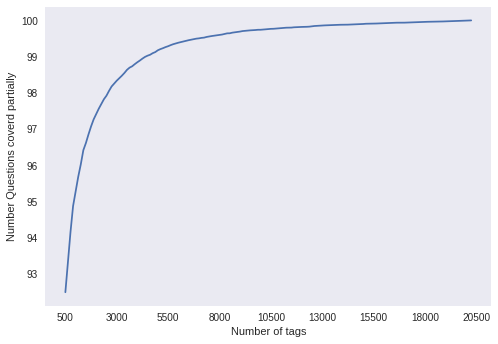

with  5500 tags we are covering  99.481 % of questions
with  500 tags we are covering  92.5 % of questions


In [0]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 500(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")
print("with ",500,"tags we are covering ",questions_explained[0],"% of questions")

In [0]:
# we will be taking 500 tags
multilabel_yx = tags_to_choose(500)
print("number of questions that are not covered :", questions_explained_fn(500),"out of ", total_qs)

number of questions that are not covered : 7500 out of  100000


### Spliting Data using : Train_Test_Split 

In [0]:
train_datasize =400000
x_train=preprocessed_data.head(train_datasize)
x_test=preprocessed_data.tail(preprocessed_data.shape[0] - 400000)

y_train = multilabel_yx[0:train_datasize,:]
y_test = multilabel_yx[train_datasize:preprocessed_data.shape[0],:]

In [0]:
x_test=preprocessed_data.tail(preprocessed_data.shape[0] - 400000)
x_test.shape

(10000, 2)

In [0]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)
print("Number of data points in train data :", x_test.shape)
print("Number of data points in test data :", x_train.shape)
x_test_multilabel_bow = vectorizer.transform(x_test['question'])

Number of data points in train data : (100000, 500)
Number of data points in test data : (0, 500)
Number of data points in train data : (0, 2)
Number of data points in test data : (100000, 2)


In [0]:
start = datetime.now()
vectorizer = CountVectorizer(min_df=0.00009, max_features=20000, \
                             tokenizer = lambda x: x.split(), ngram_range=(1,2))
x_train_multilabel_bow = vectorizer.fit_transform(x_train['question'])
x_test_multilabel_bow = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:12.450817


In [0]:
#start = datetime.now()
#vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
#                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
#x_train_multilabel = vectorizer.fit_transform(x_train['question'])
#x_test_multilabel = vectorizer.transform(x_test['question'])
#print("Time taken to run this cell :", datetime.now() - start)

In [0]:
print("Dimensions of train data X:",x_train_multilabel_bow.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel_bow.shape,"Y:",y_test.shape)

Dimensions of train data X: (40000, 20000) Y : (40000, 500)
Dimensions of test data X: (10000, 20000) Y: (10000, 500)


# SGDClassifier(loss='log') using TF-Idf W2V Method

In [0]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel_bow, y_train)
predictions = classifier.predict (x_test_multilabel_bow)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

In [0]:
joblib.dump(classifier, 'lr_with_more_title_weight.pkl') 

# LogisticRegression using TF-IDF  W2V Method 

In [0]:
start = datetime.now()
classifier_2 = OneVsRestClassifier(LogisticRegression(penalty='l1'), n_jobs=-1)
classifier_2.fit(x_train_multilabel, y_train)
predictions_2 = classifier_2.predict(x_test_multilabel)
print("Accuracy :",metrics.accuracy_score(y_test, predictions_2))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions_2))


precision = precision_score(y_test, predictions_2, average='micro')
recall = recall_score(y_test, predictions_2, average='micro')
f1 = f1_score(y_test, predictions_2, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_2, average='macro')
recall = recall_score(y_test, predictions_2, average='macro')
f1 = f1_score(y_test, predictions_2, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions_2))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.2076
Hamming loss  0.0029726
Micro-average quality numbers
Precision: 0.6862, Recall: 0.3211, F1-measure: 0.4375
Macro-average quality numbers
Precision: 0.4727, Recall: 0.2299, F1-measure: 0.2938
              precision    recall  f1-score   support

           0       0.57      0.17      0.26       773
           1       0.78      0.40      0.53       753
           2       0.83      0.56      0.67       695
           3       0.69      0.42      0.52       642
           4       0.87      0.67      0.75       520
           5       0.92      0.72      0.81       530
           6       0.65      0.27      0.38       353
           7       0.85      0.61      0.71       330
           8       0.72      0.43      0.53       310
           9       0.66      0.38      0.49       280
          10       0.62      0.18      0.28       288
          11       0.83      0.60      0.70       294
          12       0.46      0.07      0.12       253
          13       0.62      0.21

# Question 1 : LogisticRegression using BOW Method

In [0]:
predictions_2 = classifier_2.predict(x_test_multilabel_bow)

In [0]:
start = datetime.now()
classifier_2 = OneVsRestClassifier(LogisticRegression(penalty='l1'))
classifier_2.fit(x_train_multilabel_bow, y_train)
predictions_2 = classifier_2.predict(x_test_multilabel_bow)


In [0]:
print("Accuracy :",metrics.accuracy_score(y_test, predictions_2))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions_2))


precision = precision_score(y_test, predictions_2, average='micro')
recall = recall_score(y_test, predictions_2, average='micro')
f1 = f1_score(y_test, predictions_2, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_2, average='macro')
recall = recall_score(y_test, predictions_2, average='macro')
f1 = f1_score(y_test, predictions_2, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions_2))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.21441
Hamming loss  0.00310812
Micro-average quality numbers
Precision: 0.5765, Recall: 0.3988, F1-measure: 0.4715
Macro-average quality numbers
Precision: 0.4442, Recall: 0.3323, F1-measure: 0.3766
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      5519
           1       0.61      0.36      0.46      8190
           2       0.72      0.43      0.54      6529
           3       0.71      0.52      0.60      3231
           4       0.71      0.47      0.57      6430
           5       0.68      0.40      0.50      2879
           6       0.79      0.55      0.65      5086
           7       0.78      0.60      0.68      4533
           8       0.45      0.16      0.23      3000
           9       0.72      0.60      0.65      2765
          10       0.47      0.27      0.34      3051
          11       0.59      0.43      0.50      3009
          12       0.50      0.35      0.41      2630
          13       0.57      0.

# Question 2 : estimator__C and estimator__penalty using GridSearchCv

In [0]:
from sklearn.model_selection import GridSearchCV
clf=OneVsRestClassifier(LogisticRegression())
parameters={'estimator__C':[0.1,0.001,0.0001],
            'estimator__penalty':['l1','l2']}
gcv=GridSearchCV(clf,param_grid=parameters,cv=5)
gcv.fit(x_train_multilabel_bow, y_train)
print(gcv.best_params_)
print(gcv.best_score_)

In [0]:
clf.get_params().keys()

dict_keys(['estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

In [0]:

clf1=OneVsRestClassifier(LogisticRegression(c=100,penalty='l1'), n_jobs=-1)
clf1.fit(x_train_multilabel_bow, y_train)
pred=clf1.predict(x_test_multilabel_bow)

print("Accuracy :",metrics.accuracy_score(y_test, pred))
print("Hamming loss ",metrics.hamming_loss(y_test,pred))


precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')
f1 = f1_score(y_test, predpred, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
f1 = f1_score(y_test, pred, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, pred))
print("Time taken to run this cell :", datetime.now() - start)


#  Question 3 : SGDClassifier(loss='hinge')

In [0]:
y_train

<400000x500 sparse matrix of type '<class 'numpy.int64'>'
	with 753683 stored elements in Compressed Sparse Row format>

In [0]:
start = datetime.now()
#Classifier = OneVsRestClassifier(SGDClassifier(random_state=0,loss='log',alpha=0.00001,penalty='elasticnet')).fit(Finaldata,y)
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l1'))
classifier.fit(x_train_multilabel_bow, y_train)
predictions = classifier.predict(x_test_multilabel_bow)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.10983109831098312
Hamming loss  0.005943459434594346
Micro-average quality numbers
Precision: 0.2861, Recall: 0.4748, F1-measure: 0.3571
Macro-average quality numbers
Precision: 0.2057, Recall: 0.4074, F1-measure: 0.2652
              precision    recall  f1-score   support

           0       0.72      0.80      0.75      5519
           1       0.45      0.44      0.45      8189
           2       0.52      0.48      0.50      6529
           3       0.50      0.59      0.54      3231
           4       0.52      0.55      0.54      6430
           5       0.43      0.48      0.45      2878
           6       0.59      0.62      0.60      5086
           7       0.60      0.67      0.63      4533
           8       0.24      0.21      0.22      3000
           9       0.54      0.70      0.61      2765
          10       0.30      0.38      0.33      3051
          11       0.45      0.51      0.47      3009
          12       0.37      0.42      0.40      2630
         

### Comparsions

#### Preety Table

In [0]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["ALGO" , "Hamming Loss" , 'Micro-average','F1-Precision','Recall','F1-measure']

     
x.add_row([ "LR with BOW" , 0.00310 , '----' , 0.5765,  0.3988 , 0.4715 ])
x.add_row([ "SVM with BOW" , 0.00594 , '----', 0.2861,0.4748, 0.3571 ])

print(x)

+--------------+--------------+---------------+--------------+--------+------------+
|     ALGO     | Hamming Loss | Micro-average | F1-Precision | Recall | F1-measure |
+--------------+--------------+---------------+--------------+--------+------------+
| LR with BOW  |    0.0031    |      ----     |    0.5765    | 0.3988 |   0.4715   |
| SVM with BOW |   0.00594    |      ----     |    0.2861    | 0.4748 |   0.3571   |
+--------------+--------------+---------------+--------------+--------+------------+


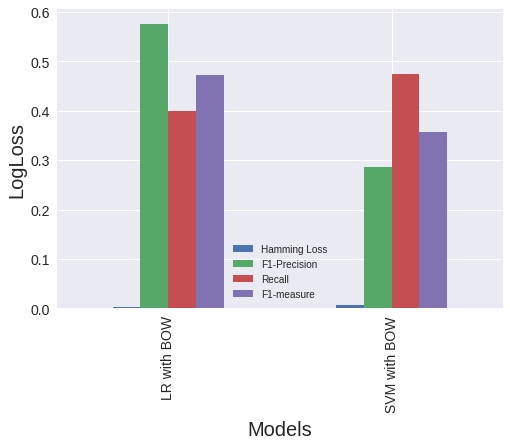

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
a=pd.DataFrame([ ['LR with BOW',0.0031,0.5765 , 0.3988 ,  0.4715] ,[' SVM with BOW',0.00594,0.2861 , 0.4748 , 0.3571 ] ],
               columns=["MODELS",'Hamming Loss','F1-Precision' , 'Recall','F1-measure'],
               )
a.set_index('MODELS', inplace=True)
a.plot(kind='bar')
plt.xlabel("Models",fontsize=20)
plt.ylabel("LogLoss",fontsize=20)
plt.xticks(fontsize=14) #rotation=90)
plt.yticks(fontsize=14)
plt.show()


### Summary:
*  This is  MultiLabel Classification Problem as we need to predict one ore more TAGS for each StackOverFlow Question
* AS, this is   MultiLabel Classification probrlm we have implemented OnevsRestClassifier Technique along with the ML models
*  we have nearly 1M DataPoints and more than 18000 Tags ie...
  * we need to apply ML model on 1M DataPoints for 18000  Tags (means ML model runs for 18000 Tags ie each model runs 18000 times on 1M DataPoins) as it is Computations Expensive Task as my System is not highlyConfugrable one
  * So i took  0.5M dataPoints for this probelm 
  and took tags which covered more than 90% of questions (500 tags covered 90% of questions)
  * we have this only redyced datapoints and tags for Computatio Purpose only
  * we can apply above code for the complete DATAPoints and Tags
* As title is the more imporatnt feature compared to the other features so i have given more weightage to the title ie 3time weight to title(repeated title feature 3times in each data)
* converted all Text Data Features to the TFIDF W2V and BOW Vectors
* Applied ML Models on top of that data 
 #### ML MOdels
* Done  Logistic Regression with  BOW Vector  and  Linear SVM BOW Vector
* SVM with BOW Vector perform better than the LogisticRehgression